<a href="https://colab.research.google.com/github/mas192/NLP-with-Python/blob/master/Ideal_Work_Culture__c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Source https://towardsdatascience.com/predicting-wine-quality-using-text-reviews-8bddaeb5285d

/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin


In [ ]:
import pandas as pd
import numpy as np

In [ ]:

from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
!ls '/gdrive/My Drive/Colab Notebooks/capstone_project'

df_words.json  Ideal_Work_Culture__c.ipynb


In [ ]:


tractionondemand_path = '/gdrive/My Drive/Brainstation/Project/tractionondemand/'
capstone_project_path = '/gdrive/My Drive/Colab Notebooks/capstone_project'
df = pd.read_json('/gdrive/My Drive/Colab Notebooks/capstone_project/df_words.json')

In [ ]:
df.sample(5).T

,6189,7171,67,14820,5438
Love_to_do_in_freetime__c,"Playing soccer, long-distance running, and pla...","Living in beautiful Vancouver, I love to do na...","Play League of Legends, Bowling, GO-KART",I love traveling and spending time in the Rock...,Travel or watch travel vlogs or read travel blogs
Ideal_Work_Culture__c,"Every one works hard and efficiently, and deli...",A company culture that is like a big family. E...,Relaxed but at the same time place that I want...,I feel most comfortable in a community culture...,Professional but still fun.
What_drives_you_nuts__c,"There was a time, a mouse run around in my hom...",When people complain too much and don't do any...,bugs - either real bugs or software,A lot of things that drive me nuts has to do w...,Over-Commitment
Funniest_thing_in_last_5_days__c,"One evening when I went out for running, I saw...",The funniest thing that happened to me is to s...,Went to English Bay at 3 am with my friends fo...,"While out on a lemur survey (in Madagascar), o...","The funniest thing happened yesterday, when I ..."
Craziest_Thing__c,"About 2 years ago, one morning when I drove to...",Moving to another country and starting my life...,"Just after my midterms, had 5 free days, so I ...",The most reckless thing I have done in the las...,"Paragliding over the ocean in Goa, India"
Status__c,Not Hired,Not Hired,Not Hired,Not Hired,Not Hired


In [ ]:
df.Status__c.unique()

array(['Not Hired', 'Hired'], dtype=object)

In [ ]:
df.Status__c.unique()

array(['Not Hired', 'Hired'], dtype=object)

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk. tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize

#set seaborn style
sns.set(style='whitegrid')

#setting up stopwords

stopwords = set(stopwords.words('english'))

#Detokenizer combines tokenzied elements

detokenizer = TreebankWordDetokenizer()


In [ ]:
#

def clean_description(sentences):
    sentences = word_tokenize(sentences.lower())
    sentences = [token for token in sentences if token not in stopwords and token.isalpha()]
    return detokenizer.detokenize(sentences)

df['Ideal_Work_Culture__c'] = df['Ideal_Work_Culture__c'].apply(clean_description)

In [ ]:
Ideal_word_occurence = df.Ideal_Work_Culture__c.str.split(expand=True).stack().value_counts()
display(type(Ideal_word_occurence))
display(Ideal_word_occurence[:30])

pandas.core.series.Series

work             5668
culture          3565
people           3010
environment      2731
team             2654
would            2237
like             2169
working          1784
fun              1546
ideal            1338
one              1309
company          1229
open             1117
everyone         1063
place            1060
friendly         1036
also              985
want              935
hard              924
love              918
learn             786
collaborative     744
ideas             737
new               711
employees         704
good              654
learning          617
time              574
grow              564
supportive        558
dtype: int64

In [ ]:
Ideal_to_do_total_words = sum(Ideal_word_occurence)
display(type(Ideal_to_do_total_words))
display(Ideal_to_do_total_words)

int

140280

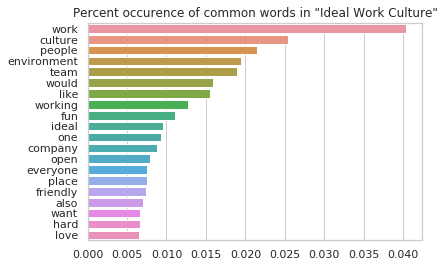

In [ ]:
#plot the most common words

Ideal_common_words = Ideal_word_occurence[:20]/Ideal_to_do_total_words

ax = sns.barplot(x= Ideal_common_words.values, y =Ideal_common_words.index)
ax.set_title('Percent occurence of common words in "Ideal Work Culture"')
plt.show()

In [ ]:
df.Status__c.value_counts()

Not Hired    9140
Hired         344
Name: Status__c, dtype: int64

In [ ]:
hired_imbalance = 7899/343
other_imbalance = 2679/343
display(round(hired_imbalance))
display(round(other_imbalance))

23

8

In [ ]:
total_classes = 2
embedding_dim = 300
epochs = 100
batch_size = 120
max_len = 100


In [ ]:
from keras.models import Model, load_model
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import Input
from keras.layers import Activation
from keras.layers import CuDNNGRU
from keras.layers import Bidirectional
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import Callback

In [ ]:
y = df.loc[:,['Status__c']]

In [ ]:
y = pd.get_dummies(y)

In [ ]:
y.sample(10)

,Status__c_Hired,Status__c_Not Hired
10671,0,1
9397,0,1
15696,0,1
11299,0,1
13492,0,1
13667,0,1
3634,0,1
14933,0,1
6152,0,1
3214,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Ideal_Work_Culture__c,
                                                   y, test_size = 0.2, random_state = 42, stratify=y) # stratify the y


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state= 42, stratify=y_train)

In [ ]:
display(type(y_val))
display(y_val.shape)

pandas.core.frame.DataFrame

(1518, 2)

In [ ]:
# Prepare embeddings 
# Embedding Download from https://nlp.stanford.edu/projects/glove/
# I am using glove.840B.300d.zip

embeddings_index = {}

# #Creating word vector dictionary from pre_trained word vectors

# file = open('glove.840B.300d.txt', encoding='utf8')
# from google.colab import drive
# drive.mount('/gdrive')


In [ ]:
file = open('/gdrive/My Drive/Brainstation/Project/tractionondemand/glove.840B.300d.txt', encoding='utf8')

In [ ]:
for line in file:
    values = line.split()
    word = ''.join(values[:-embedding_dim])
    coefs = np.asarray(values[-embedding_dim],dtype='float32')
    embeddings_index[word] = coefs
file.close
    

<function TextIOWrapper.close>

In [ ]:
#training tokenizer
tokenizer = Tokenizer(num_words = None)
tokenizer.fit_on_texts(X_train)

In [ ]:
#fitting tokenzier
sequences_train = tokenizer.texts_to_sequences(X_train)

In [ ]:
seqeunces_val = tokenizer.texts_to_sequences(X_val)

In [ ]:
#padding any short squences with 0s
X_train = pad_sequences(sequences_train, maxlen = max_len)


In [ ]:
X_val = pad_sequences(seqeunces_val, maxlen = max_len)

In [ ]:
#Creating the embedding layer, words that are not in the vocabulary are assigned to zero vector
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))



In [ ]:
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = Embedding(len(word_index)+1, embedding_dim, 
                            weights = [embedding_matrix], 
                            input_length = max_len,
                           trainable = False)
input = Input(shape=(max_len, ), dtype = 'int32')



In [ ]:
embedded_sequences = embedding_layer(input)

In [ ]:
from keras.layers import GlobalMaxPooling1D
x = Bidirectional(CuDNNGRU(50, return_sequences=True))(embedded_sequences)
x = GlobalMaxPooling1D()(x)
x = Dense(50, activation = 'relu')(x)
x = Dropout(0.1)(x)

In [ ]:
output = Dense(total_classes, activation = 'softmax')(x)
model = Model(input=input, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer = 'adam',
              metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  


In [ ]:
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss',
                            verbose=1, save_best_only=True,
                            mode='min')
early = EarlyStopping(monitor='val_loss', mode='min',patience = 3)
callback = [checkpoint, early]

In [ ]:
model.fit(X_train, y_train, batch_size=batch_size,
         epochs=epochs, validation_data =(X_val, y_val),
         callbacks = callback)

Train on 6069 samples, validate on 1518 samples
Epoch 1/100
6069/6069 [==============================] - 1s 238us/step - loss: 0.2194 - acc: 0.9461 - val_loss: 0.1645 - val_acc: 0.9638

Epoch 00001: val_loss improved from inf to 0.16446, saving model to model.h5
Epoch 2/100
6069/6069 [==============================] - 1s 120us/step - loss: 0.1592 - acc: 0.9638 - val_loss: 0.1588 - val_acc: 0.9638

Epoch 00002: val_loss improved from 0.16446 to 0.15878, saving model to model.h5
Epoch 3/100
6069/6069 [==============================] - 1s 127us/step - loss: 0.1505 - acc: 0.9638 - val_loss: 0.1555 - val_acc: 0.9638

Epoch 00003: val_loss improved from 0.15878 to 0.15547, saving model to model.h5
Epoch 4/100
6069/6069 [==============================] - 1s 124us/step - loss: 0.1504 - acc: 0.9638 - val_loss: 0.1565 - val_acc: 0.9638

Epoch 00004: val_loss did not improve from 0.15547
Epoch 5/100
6069/6069 [==============================] - 1s 121us/step - loss: 0.1472 - acc: 0.9638 - val_loss

In [ ]:

predict_val = model.predict(X_val)
predict_val = [np.argmax(x) for x in predict_val]
display(len(predict_val))


1518

In [ ]:
display(type(y_val))
y_val_array = y_val.to_numpy()
display(type(y_val_array))
display(len(y_val_array))
y_val_array = [np.argmax(x) for x in y_val_array]

pandas.core.frame.DataFrame

numpy.ndarray

1518

In [ ]:
display(len(y_val))
display(len(predict_val))

1518

1518

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy_score = accuracy_score(y_val_array, predict_val)

In [ ]:
accuracy_score

0.9637681159420289

In [ ]:
cm = confusion_matrix(y_val_array,predict_val)
cm

array([[   0,   55],
       [   0, 1463]])

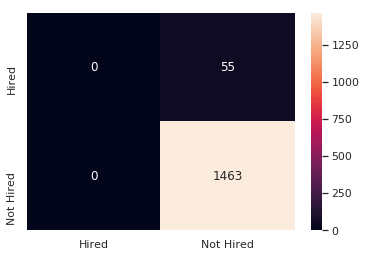

In [ ]:
sns.heatmap(cm,annot=True,
            xticklabels=['Hired','Not Hired'],yticklabels=['Hired','Not Hired'],
           fmt='g')
plt.show()